<a href="https://colab.research.google.com/github/Jdasanja/masers_thesis/blob/main/ML_algorithm_4_multilabel_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
# Load the dataset from the raw GitHub URL
url = 'https://raw.githubusercontent.com/Jdasanja/masers_thesis/main/processed.cleveland.data'
df = pd.read_csv(url, header=None)

# Add column names (based on standard attribute names for the Cleveland dataset)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'num']

# Add a unique identifier column
df['patient_id'] = range(1, len(df) + 1)

# Set 'patient_id' as the index
df.set_index('patient_id', inplace=True)

# Display first few rows of the uploaded file with headers
print("First few rows of the uploaded file with column headers:")
print(df.head())

First few rows of the uploaded file with column headers:
             age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
patient_id                                                                  
1           63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0   
2           67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0   
3           67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0   
4           37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0   
5           41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0   

            oldpeak  slope   ca thal  num  
patient_id                                 
1               2.3    3.0  0.0  6.0    0  
2               1.5    2.0  3.0  3.0    2  
3               2.6    2.0  2.0  7.0    1  
4               3.5    3.0  0.0  3.0    0  
5               1.4    1.0  0.0  3.0    0  


In [2]:
import numpy as np

## Replace question marks with NaN
df.replace('?', np.nan, inplace=True)

## Total count of missing values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [3]:
## Drop rows with NaN values
df.dropna(inplace=True)

## Verify if any null values remain
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [4]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame
# Drop the unique identifier and the target column from features
X = df.drop(columns=['num'])

# Separate the target
y = df['num']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Performed a stratified split
# Now, X_train and X_test contain only relevant feature columns
# y_train and y_test contain only the target variable

In [5]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

<h1> <strong>Transformation Test 1: </strong></h1>
<br>
Logarithmic Transformation of for Resting Blood Pressure and Cholesterol.
Squared Transformation of Maximum Heart Rate

In [6]:
# Custom Transformer for Logarithmic Transformation
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = np.log1p(X_copy[self.columns])
        return X_copy

# Custom Transformer for Square Transformation
class SquareTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = X_copy[self.columns] ** 2
        return X_copy

# Define the columns for transformation
log_transform_columns = ['trestbps', 'chol']
square_transform_columns = ['thalach']

# Define the preprocessing pipeline
ct = ColumnTransformer(
    transformers=[
        ("log_transform", LogTransformer(log_transform_columns), log_transform_columns),
        ("square_transform", SquareTransformer(square_transform_columns), square_transform_columns),
        ("scaling", StandardScaler(), ['age', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope']),
        ("onehot", OneHotEncoder(sparse_output=False), ['ca', 'thal'])
    ],
    remainder='drop'  # Drop all other columns not specified
)

# Apply the transformations to training and testing data
X_train_transformedtest = ct.fit_transform(X_train)
X_test_transformedtest = ct.transform(X_test)

<h2> Random Forrest Classifier on Transformation 1 </h2>

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy of the model: 0.5666666666666667
F1 Score of the model: 0.49462845651080944
Precision: 0.7400432900432901
Recall: 0.5666666666666667


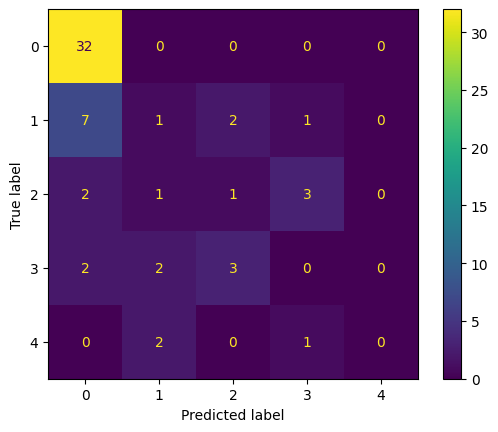

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,precision_score, recall_score
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=5)

# Training the model on the training dataset
clf.fit(X_train_transformedtest, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_transformedtest)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

<h2> XGB Classifier on Transformation 1 </h2>

In [8]:
# Import the necessary library
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(X_train_transformedtest, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_transformedtest)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.5833333333333334
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        32
           1       0.31      0.36      0.33        11
           2       0.00      0.00      0.00         7
           3       0.14      0.14      0.14         7
           4       0.00      0.00      0.00         3

    accuracy                           0.58        60
   macro avg       0.26      0.29      0.27        60
weighted avg       0.53      0.58      0.56        60



<h1><strong> Transformation Test 2 </strong></h1>
<ol>
<li>Logarithmic Transformation for Resting Blood Pressure and Cholesterol.</li>
<li>Squared Transformation of Maximum Heart Rate</li>
<li> <strong>combination of oldpeak and slope </strong></li> </ol>

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# Custom Transformer for Logarithmic Transformation
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = np.log1p(X_copy[self.columns])
        return X_copy

# Custom Transformer for Square Transformation
class SquareTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = X_copy[self.columns] ** 2
        return X_copy

# Custom Transformer for Combining 'oldpeak' and 'slope'
class CombineOldpeakSlope(BaseEstimator, TransformerMixin):
    def __init__(self, method='add'):  # Choose method: 'add', 'multiply', 'weighted'
        self.method = method

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        if self.method == 'add':
            X_copy['oldpeak_slope_combined'] = X_copy['oldpeak'] + X_copy['slope']
        elif self.method == 'multiply':
            X_copy['oldpeak_slope_combined'] = X_copy['oldpeak'] * X_copy['slope']
        elif self.method == 'weighted':
            X_copy['oldpeak_slope_combined'] = 0.6 * X_copy['oldpeak'] + 0.4 * X_copy['slope']
        return X_copy.drop(columns=['oldpeak', 'slope'])

# Define the columns for transformation
log_transform_columns = ['trestbps', 'chol']
square_transform_columns = ['thalach']
combine_columns = ['oldpeak', 'slope']

# Define the preprocessing pipeline
ct = ColumnTransformer(
    transformers=[
        ("log_transform", LogTransformer(log_transform_columns), log_transform_columns),
        ("square_transform", SquareTransformer(square_transform_columns), square_transform_columns),
        ("combine_oldpeak_slope", CombineOldpeakSlope(method='add'), combine_columns),
        ("scaling", StandardScaler(), ['age', 'sex', 'fbs', 'restecg', 'exang']),
        ("onehot", OneHotEncoder(sparse_output=False), ['ca', 'thal', 'cp'])
    ],
    remainder='drop'  # Drop all other columns not specified
)

# Apply the transformations to training and testing data
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

<h2> Random Forrest Classifier on Transformation 2 </h2>

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy of the model: 0.6
F1 Score of the model: 0.5384692384692384
Precision: 0.7487012987012986
Recall: 0.6


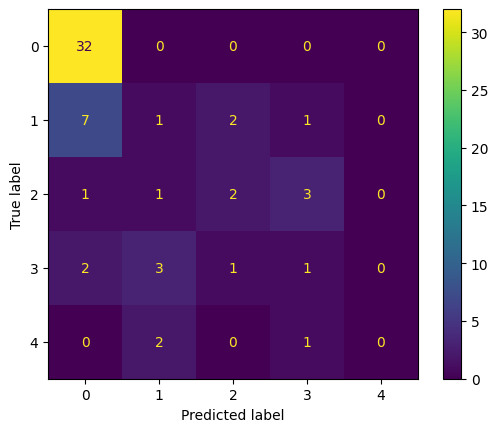

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,precision_score, recall_score
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=1000, random_state=1,max_depth=20)

# Training the model on the training dataset
clf.fit(X_train_transformed, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_transformed)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

<h2>XGB Forrest Classifier on Transformation 2</h2>

In [11]:
# Import the necessary library
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the model
xgb_classifier.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_transformed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.5666666666666667
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.21      0.27      0.24        11
           2       0.25      0.14      0.18         7
           3       0.17      0.14      0.15         7
           4       0.00      0.00      0.00         3

    accuracy                           0.57        60
   macro avg       0.29      0.29      0.29        60
weighted avg       0.53      0.57      0.54        60



<h1> PCA Transformation: </h1>

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca95 = PCA(n_components=0.95)
X_train_pca95 = pca95.fit(X_train_transformed)

print('-'*20 + 'Explained variance ratio' + '-'*20)
print(X_train_pca95.explained_variance_ratio_)

--------------------Explained variance ratio--------------------
[0.9999998]


In [14]:
X_train_pca = pca95.fit_transform(X_train_transformed)
X_test_pca = pca95.transform(X_test_transformed)

<h2> Random Forrest Classifier with PCA Transformation </h2>

Accuracy of the model: 0.5666666666666667
F1 Score of the model: 0.46316056910569103
Precision: 0.8479166666666667
Recall: 0.5666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


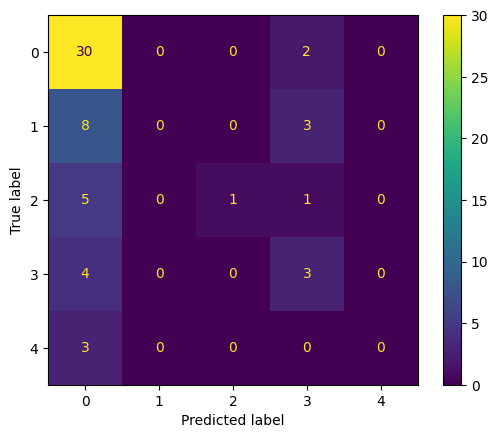

In [15]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=25, random_state=42,max_depth=2)

# Training the model on the training dataset
clf.fit(X_train_pca, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_pca)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

<h2> XGB Classifier with PCA Transformation </h2>

In [16]:
# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the model with the PCA-transformed data
xgb_classifier.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.4666666666666667
              precision    recall  f1-score   support

           0       0.71      0.69      0.70        32
           1       0.23      0.27      0.25        11
           2       0.33      0.29      0.31         7
           3       0.10      0.14      0.12         7
           4       0.00      0.00      0.00         3

    accuracy                           0.47        60
   macro avg       0.27      0.28      0.27        60
weighted avg       0.47      0.47      0.47        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<h1><strong>Tansformation Test 3 </h1></strong>
<br>
<ol>
<li>Logarithmic Transformation for Resting Blood Pressure and Cholesterol.</li>
<li>Squared Transformation of Maximum Heart Rate</li>
<li> combination of oldpeak and slope </li>
<li> <strong>GenderBasedFeatureEngineering: creates new features that capture potential differences between genders (represented by the sex column) in the dataset. It computes gender-normalized features, interaction terms, and gender-specific indicators.</strong></li>
</ol>

In [17]:
# Custom Transformer for Logarithmic Transformation
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = np.log1p(X_copy[self.columns])
        return X_copy


# Custom Transformer for Square Transformation
class SquareTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = X_copy[self.columns] ** 2
        return X_copy


# Custom Transformer for Combining 'oldpeak' and 'slope'
class CombineOldpeakSlope(BaseEstimator, TransformerMixin):
    def __init__(self, method='add'):  # Choose method: 'add', 'multiply', 'weighted'
        self.method = method

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        if self.method == 'add':
            X_copy['oldpeak_slope_combined'] = X_copy['oldpeak'] + X_copy['slope']
        elif self.method == 'multiply':
            X_copy['oldpeak_slope_combined'] = X_copy['oldpeak'] * X_copy['slope']
        elif self.method == 'weighted':
            X_copy['oldpeak_slope_combined'] = 0.6 * X_copy['oldpeak'] + 0.4 * X_copy['slope']
        return X_copy.drop(columns=['oldpeak', 'slope'])


# Custom Transformer for Gender-Based Feature Engineering
class GenderBasedFeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()

        # Gender-Normalized Features
        X_copy['thalach_norm_gender'] = X_copy['thalach'] / X_copy.groupby('sex')['thalach'].transform('mean')
        X_copy['chol_norm_gender'] = X_copy['chol'] / X_copy.groupby('sex')['chol'].transform('mean')

        # Gender-Interaction Terms
        X_copy['sex_thalach'] = X_copy['sex'] * X_copy['thalach']
        X_copy['sex_oldpeak'] = X_copy['sex'] * X_copy['oldpeak']

        # Gender-Specific Indicators
        X_copy['thalach_above_median_gender'] = (X_copy['thalach'] > X_copy.groupby('sex')['thalach'].transform('median')).astype(int)
        X_copy['chol_above_median_gender'] = (X_copy['chol'] > X_copy.groupby('sex')['chol'].transform('median')).astype(int)

        return X_copy


# Define the columns for transformation
log_transform_columns = ['trestbps', 'chol']
square_transform_columns = ['thalach']
combine_columns = ['oldpeak', 'slope']

# Define the preprocessing pipeline
ct = ColumnTransformer(
    transformers=[
        ("log_transform", LogTransformer(log_transform_columns), log_transform_columns),
        ("square_transform", SquareTransformer(square_transform_columns), square_transform_columns),
        ("combine_oldpeak_slope", CombineOldpeakSlope(method='add'), combine_columns),
        ("gender_features", GenderBasedFeatureEngineering(), list(X_train.columns)),
        ("scaling", StandardScaler(), ['age', 'sex', 'cp', 'fbs', 'restecg', 'exang']),
        ("onehot", OneHotEncoder(sparse_output=False), ['ca', 'thal'])
    ],
    remainder='drop'  # Drop all other columns not specified
)

# Apply the transformations to training and testing data
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)


<h2> Random Forrest Classifier Transformation 3 </h2>

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy of the model: 0.6166666666666667
F1 Score of the model: 0.564634703196347
Precision: 0.743364448051948
Recall: 0.6166666666666667


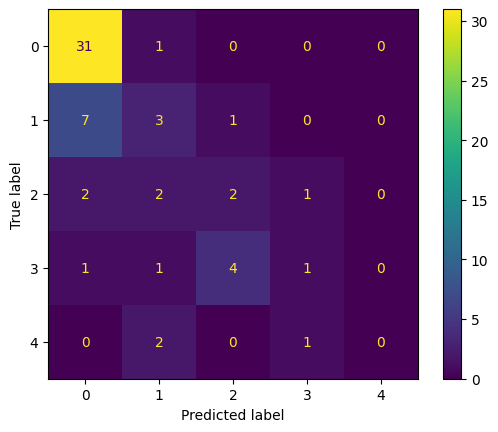

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,precision_score, recall_score
import matplotlib.pyplot as plt

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=50, random_state=42,max_depth=5)

# Training the model on the training dataset
clf.fit(X_train_transformed, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_transformed)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

<h2> Random Forrest Classifier Transformation 3 <strong>Parameter change </strong> </h2>

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy of the model: 0.6166666666666667
F1 Score of the model: 0.5181120144534779
Precision: 0.8928571428571428
Recall: 0.6166666666666667


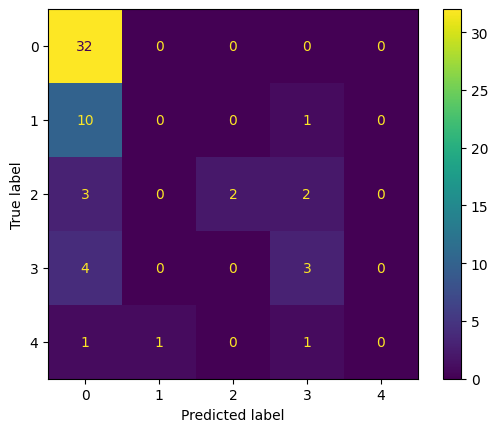

In [26]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=25, random_state=42,max_depth=2)

# Training the model on the training dataset
clf.fit(X_train_transformed, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_transformed)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

<h2>Parameter Grid Search for Random Forrest Classifier on Transformation 3 Dataset</h2>

In [27]:
# Create a Random Forest classifier
clf = RandomForestClassifier()

# Training the model on the training dataset
clf.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [25, 50, 100, 200],
    'max_depth': [2, 3, 5, 10, 20]
}

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=0),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted')
}

# Perform grid search with multiple scoring metrics
grid_search_rf = GridSearchCV(
    estimator=clf,
    param_grid=param_grid_rf,
    scoring=scoring,
    refit='f1_weighted',  # Select the best model based on F1-Weighted
    cv=3,
    verbose=1  # To monitor progress
)

# Fit the grid search
grid_search_rf.fit(X_train_transformed, y_train)

# Get the best estimator
best_rf = grid_search_rf.best_estimator_

# Output the best parameters and cross-validated scores
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validated F1-Weighted:", grid_search_rf.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'max_depth': 20, 'n_estimators': 25}
Best Cross-Validated F1-Weighted: 0.5516518716392247


In [29]:
print(best_rf)

RandomForestClassifier(max_depth=20, n_estimators=25)


<h2> Random Forrest Classifier with <strong>Optimized Parameters</strong> </h2>

Accuracy of the model: 0.65
F1 Score of the model: 0.6105328943357112
Precision: 0.7441896645021645
Recall: 0.65


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


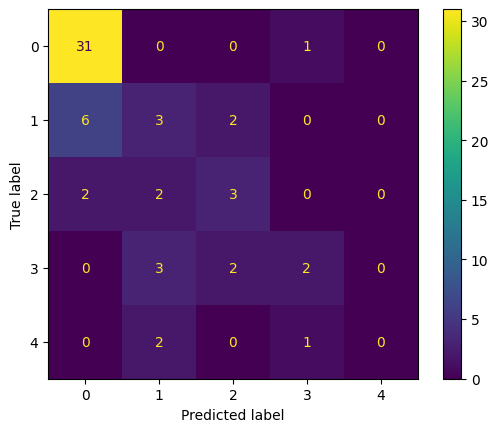

In [23]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=25, random_state=42,max_depth=20)

# Training the model on the training dataset
clf.fit(X_train_transformed, y_train)

# Performing predictions on the test dataset
y_pred = clf.predict(X_test_transformed)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

# Print accuracy and F1 score
print(f"Accuracy of the model: {accuracy}")
print(f"F1 Score of the model: {f1}")
print("Precision:", precision)
print("Recall:", recall)


# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
cmd.plot()
plt.show()

<h2> XGB Classifier Transformation 3 </h3>

In [30]:
# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the model with the PCA-transformed data
xgb_classifier.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_transformed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.6
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        32
           1       0.25      0.27      0.26        11
           2       0.40      0.29      0.33         7
           3       0.30      0.43      0.35         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.36      0.37      0.36        60
weighted avg       0.59      0.60      0.59        60



<h2> Ensemble Method Version 1 </h2>
SMOTE <br>
Class Weights<br>
Conducted on X_transformed Dataset <br>

In [31]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from imblearn.over_sampling import SMOTE
import numpy as np

# ==========================
# Handle Class Imbalance
# ==========================

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Generate sample weights
sample_weights = np.array([class_weights_dict[label] for label in y_train])

# Optional: Use SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_transformed, y_train)

# ==========================
# Define Base Classifiers
# ==========================

# Random Forest
#rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_clf = RandomForestClassifier(n_estimators=25, random_state=42,max_depth=20)
# XGBoost
xgb_clf = XGBClassifier(
    random_state=42,
    eval_metric='mlogloss',
    objective='multi:softprob'  # Multi-class objective
)

# Logistic Regression
lr_clf = LogisticRegression(
    random_state=42,
    max_iter=10000,
    solver='saga',
    penalty='l2'
)

# ==========================
# Define Ensemble Model
# ==========================

ensemble_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('xgb', xgb_clf),
        ('lr', lr_clf)
    ],
    voting='soft'  # Soft voting for probability-based decisions
)

# ==========================
# Train the Ensemble Model
# ==========================

# Fit the ensemble model with SMOTE-balanced data
ensemble_clf.fit(X_train_balanced, y_train_balanced)

# Predict on the test data
y_pred_ensemble = ensemble_clf.predict(X_test_transformed)

# ==========================
# Evaluate the Model
# ==========================

# Accuracy
accuracy = accuracy_score(y_test, y_pred_ensemble)

# F1 Score
f1 = f1_score(y_test, y_pred_ensemble, average='weighted')

# Precision
precision = precision_score(y_test, y_pred_ensemble, average='weighted', zero_division=0)

# Recall
recall = recall_score(y_test, y_pred_ensemble, average='weighted')

# Classification Report
report = classification_report(y_test, y_pred_ensemble)

# Output Results
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("\nClassification Report:")
print(report)


Accuracy: 0.65
F1 Score: 0.6476719576719577
Precision: 0.6477342549923194
Recall: 0.65

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        32
           1       0.36      0.45      0.40        11
           2       0.43      0.43      0.43         7
           3       0.29      0.29      0.29         7
           4       0.00      0.00      0.00         3

    accuracy                           0.65        60
   macro avg       0.40      0.42      0.41        60
weighted avg       0.65      0.65      0.65        60

